# Day 08. Exercise 05
# Clustering

## 0. Imports

In [87]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

import numpy as np
import matplotlib.pyplot as plt

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [88]:
df = pd.read_csv('../data/regression.csv')
df = df.drop(['uid','pageviews'], axis=1)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  29 non-null     int64  
 1   AVG(diff)    29 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 596.0 bytes


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [90]:
kmeans = KMeans(n_clusters=3, random_state=21)
kmeans.fit(df)
kmeans.labels_

array([0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 2, 1, 0, 1, 1], dtype=int32)

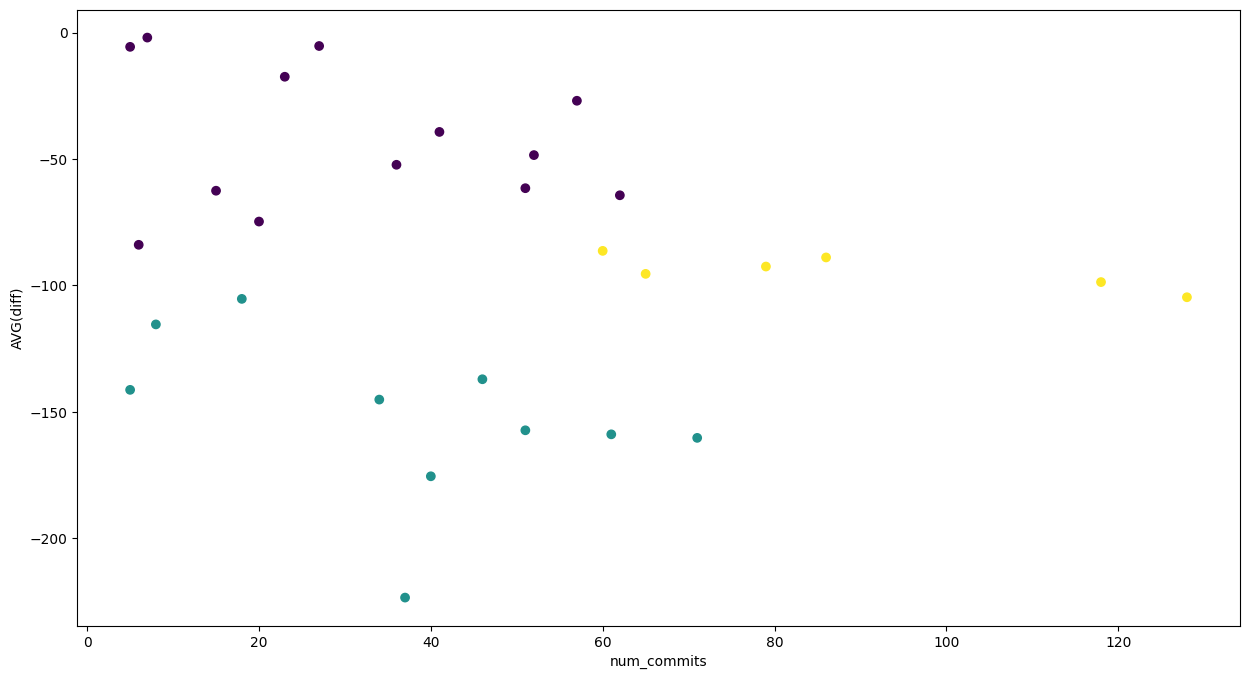

In [91]:
plt.figure(figsize=(15,8))
plt.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=kmeans.labels_)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

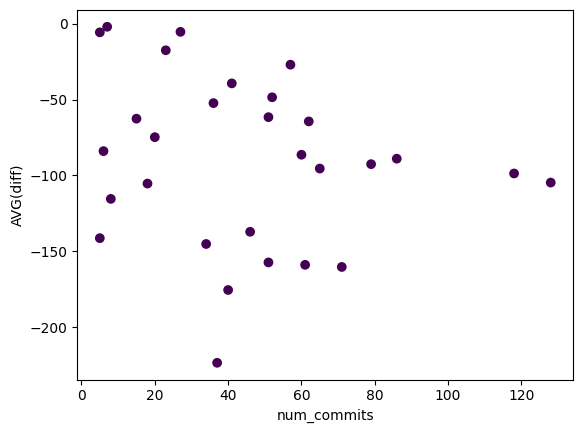

For 1 n_clusters:


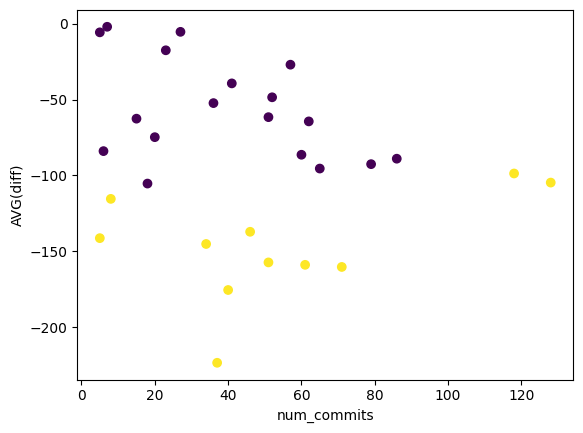

For 2 n_clusters:


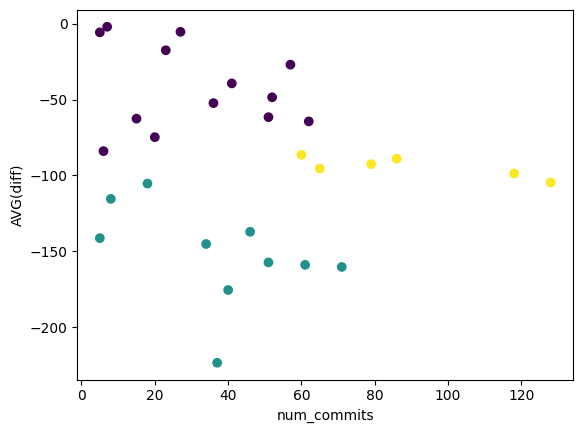

For 3 n_clusters:


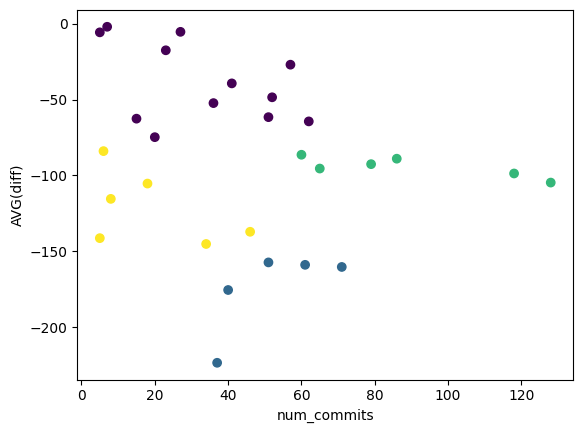

For 4 n_clusters:


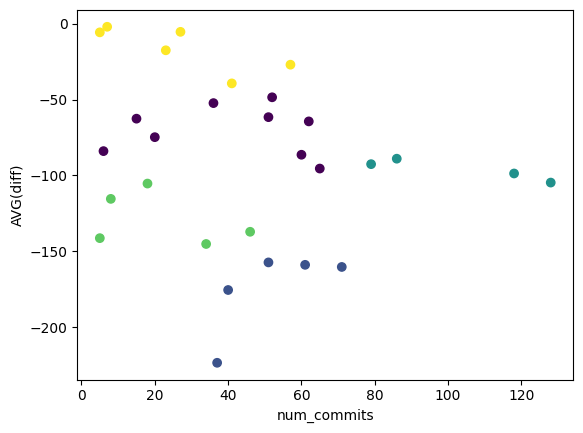

For 5 n_clusters:


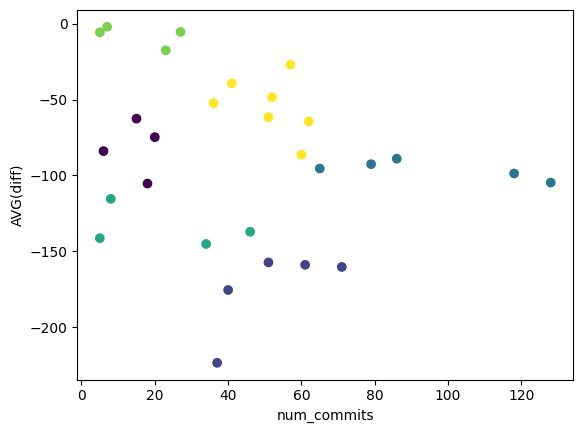

For 6 n_clusters:


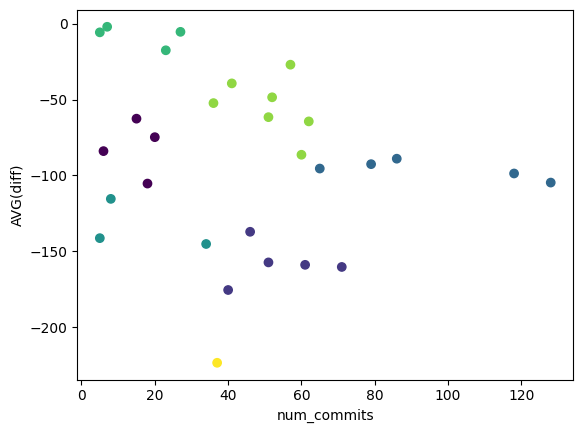

For 7 n_clusters:


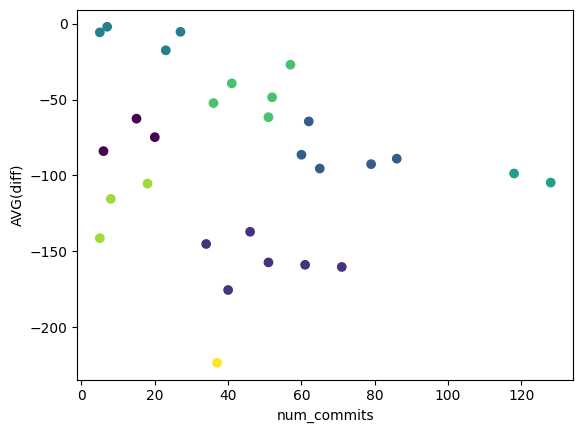

For 8 n_clusters:


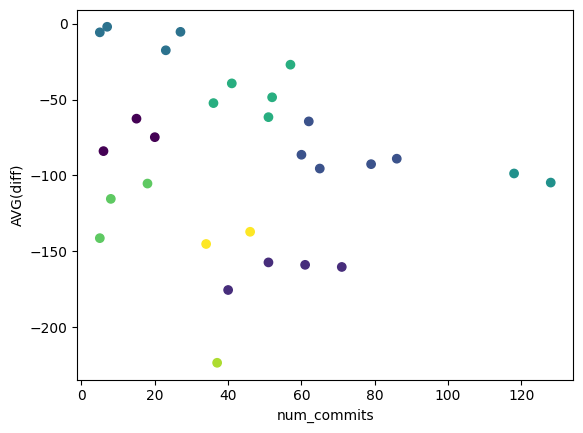

For 9 n_clusters:


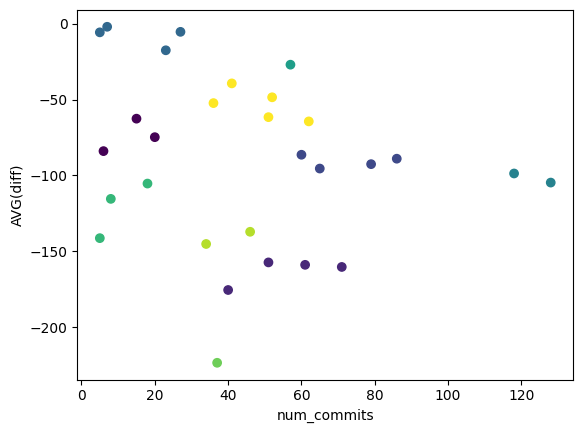

For 10 n_clusters:


In [92]:
for n in range (1, 11):
    kmeans = KMeans(n_clusters=n, random_state=21)
    kmeans.fit(df)
    plt.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=kmeans.labels_)
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.show()
    print(f'For {n} n_clusters:')

In [93]:
kmeans = KMeans(n_clusters=3, random_state=21)
kmeans.fit(df)
kmeans.labels_
s_score = silhouette_score(df, kmeans.labels_, random_state=21)
s_score

0.4454402135233297

In [94]:
for n in range (2, 11):
    kmeans = KMeans(n_clusters=n, random_state=21)
    kmeans.fit(df)
    s_score = silhouette_score(df, kmeans.labels_, random_state=21)
    print(f"For {n} clusters s_score is {s_score:.4f}")
#max for 8 clusters

For 2 clusters s_score is 0.4195
For 3 clusters s_score is 0.4454
For 4 clusters s_score is 0.4150
For 5 clusters s_score is 0.3521
For 6 clusters s_score is 0.3954
For 7 clusters s_score is 0.3964
For 8 clusters s_score is 0.4864
For 9 clusters s_score is 0.4538
For 10 clusters s_score is 0.4263


## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [95]:
clustering = DBSCAN(eps=20, min_samples=2)
clustering.fit(df)
clustering.labels_

array([ 0,  1,  2,  0,  3,  4,  5,  5,  5,  6,  7,  3,  5,  0,  8,  0,  7,
       -1, -1,  1, -1,  0,  8,  2,  4, -1,  1,  6,  2])

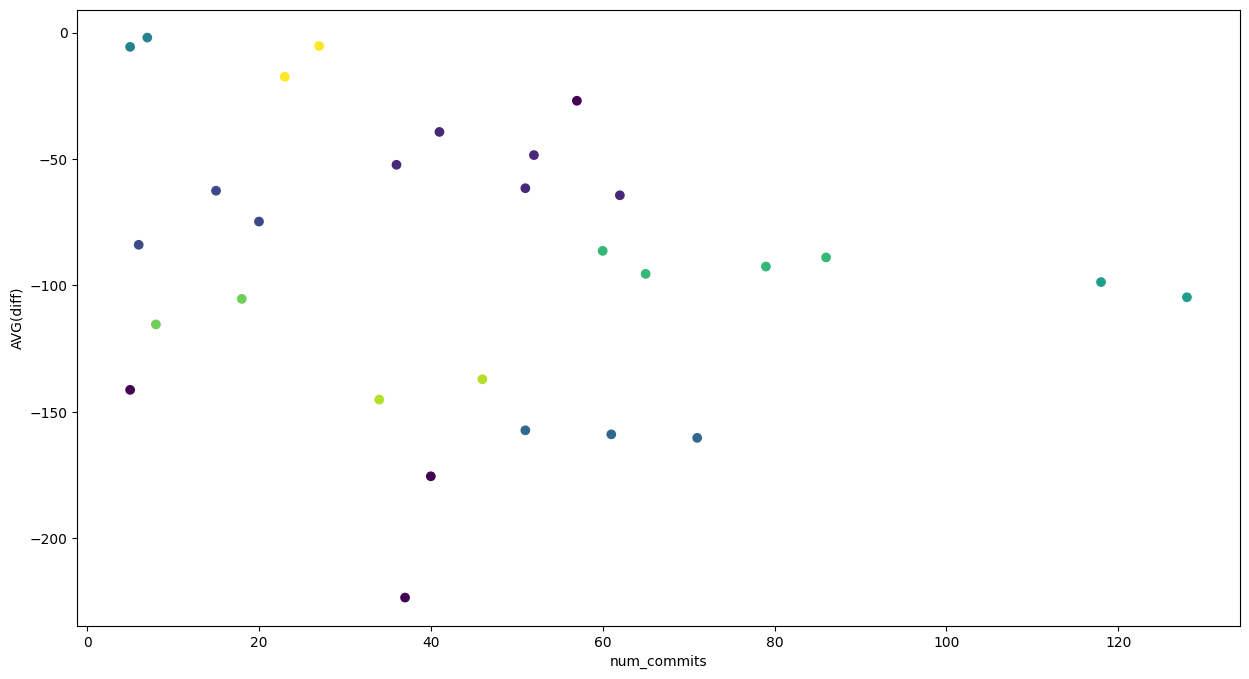

In [96]:
plt.figure(figsize=(15,8))
plt.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=clustering.labels_)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

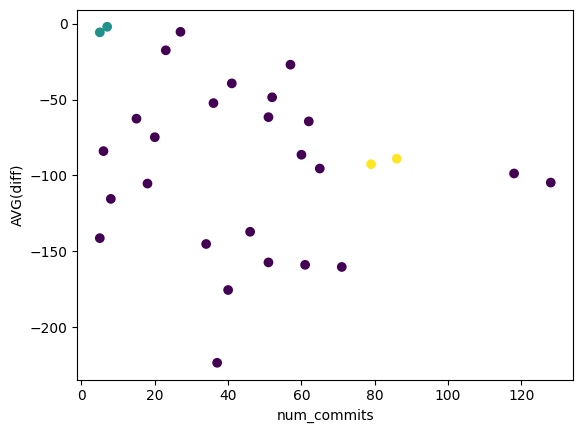

For 10 eps


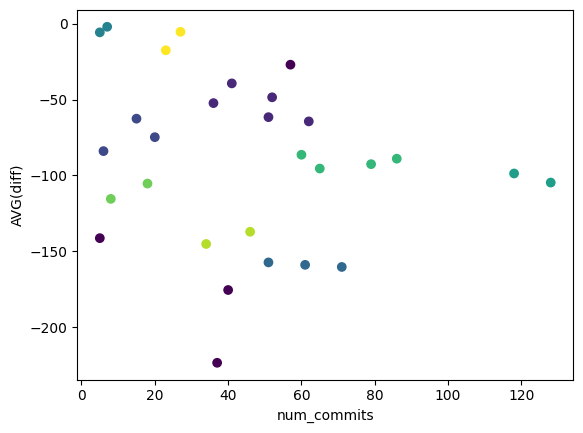

For 20 eps


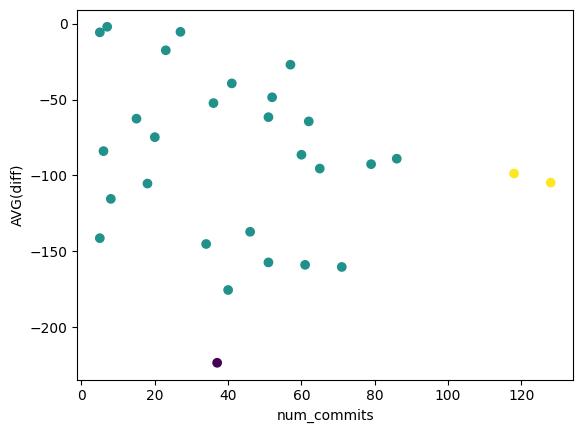

For 30 eps


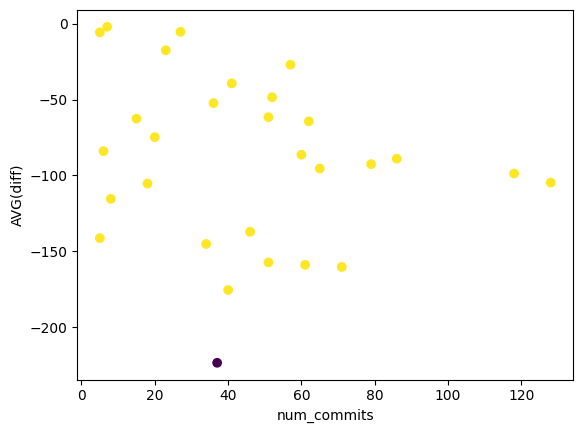

For 40 eps


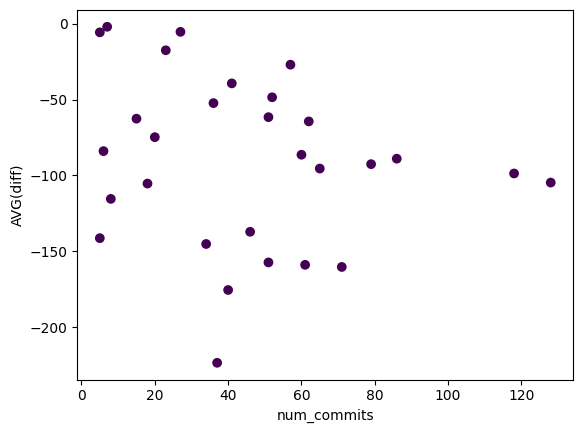

For 50 eps


In [97]:
for n in range (10, 60, 10):
    clustering = DBSCAN(eps=n, min_samples=2)
    clustering.fit(df)
    plt.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=clustering.labels_)
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.show()
    print(f'For {n} eps')

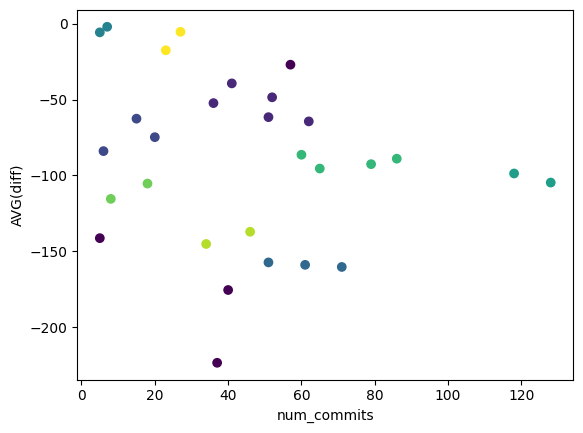

For 2 min_samples


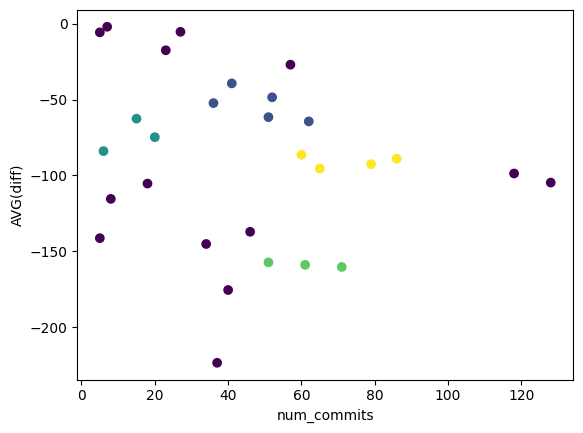

For 3 min_samples


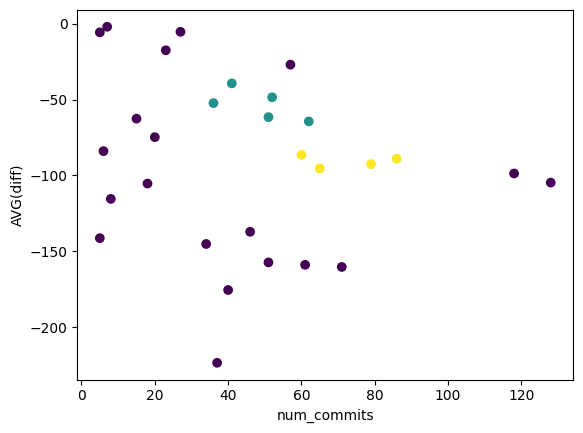

For 4 min_samples


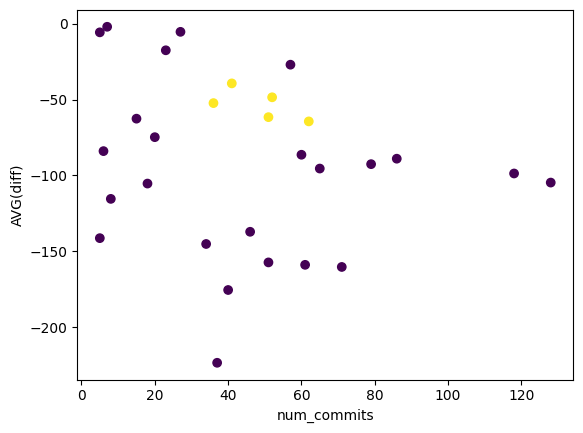

For 5 min_samples


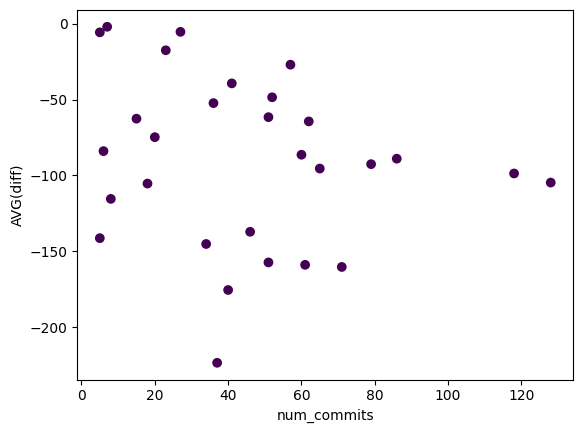

For 6 min_samples


In [98]:
for n in range (2, 7, 1):
    clustering = DBSCAN(eps=20, min_samples=n)
    clustering.fit(df)
    plt.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=clustering.labels_)
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.show()
    print(f'For {n} min_samples')

In [99]:
clustering = DBSCAN(eps=20, min_samples=2)
clustering.fit(df)
s_score = silhouette_score(df, clustering.labels_, random_state=21)
print(f"Base s_score is {s_score:.4f}")

Base s_score is 0.3834


In [100]:
for e in range (10, 50, 10):
    clustering = DBSCAN(eps=e, min_samples=2)
    clustering.fit(df)
    s_score = silhouette_score(df, clustering.labels_, random_state=21)
    print(f"For eps = {e} s_score is {s_score:.4f}")

#eps = 20 optimal

For eps = 10 s_score is -0.0792
For eps = 20 s_score is 0.3834
For eps = 30 s_score is 0.1988
For eps = 40 s_score is 0.3660


In [101]:
for n in range (2, 6):
    clustering = DBSCAN(eps=20, min_samples=n)
    clustering.fit(df)
    s_score = silhouette_score(df, clustering.labels_, random_state=21)
    print(f"For {n} samples s_score is {s_score:.4f}")
    
#min_samples = 2 optimal

For 2 samples s_score is 0.3834
For 3 samples s_score is 0.0467
For 4 samples s_score is -0.0273
For 5 samples s_score is -0.0003


## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [102]:
aggl = AgglomerativeClustering(n_clusters=5)
aggl.fit(df)
aggl.labels_

array([2, 3, 0, 2, 4, 1, 1, 1, 1, 3, 0, 4, 1, 2, 4, 2, 0, 2, 3, 3, 0, 2,
       4, 0, 1, 0, 3, 3, 0])

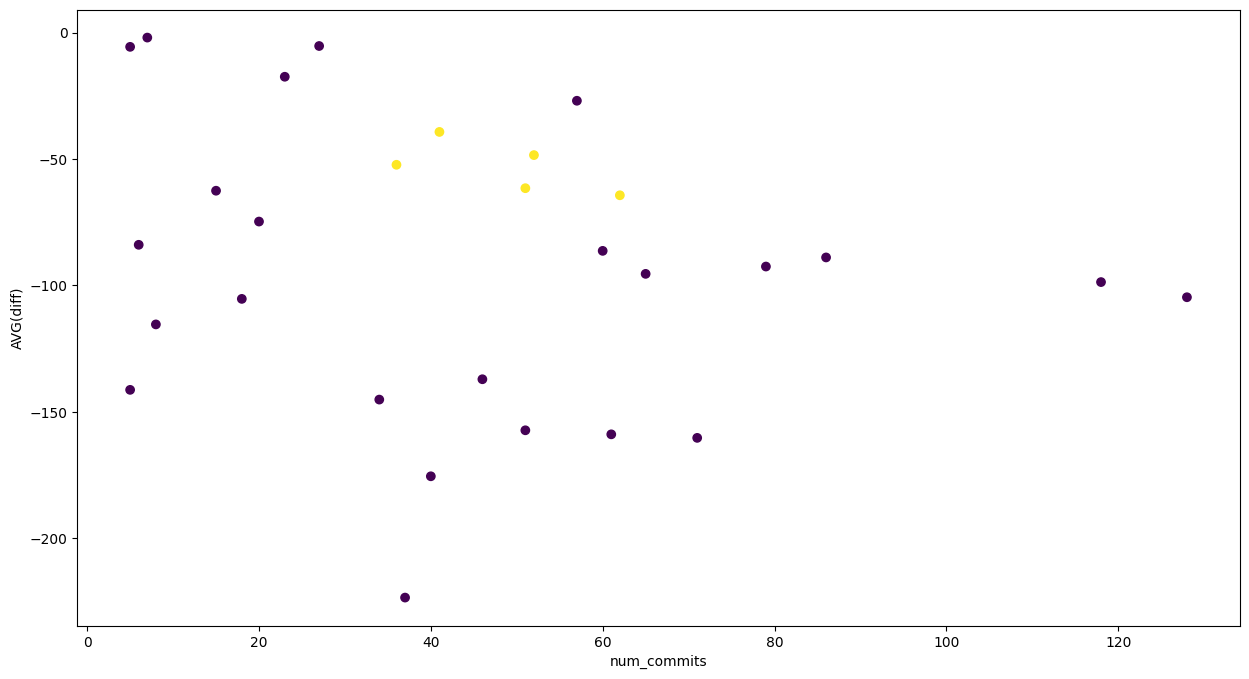

In [103]:
plt.figure(figsize=(15,8))
plt.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=clustering.labels_)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

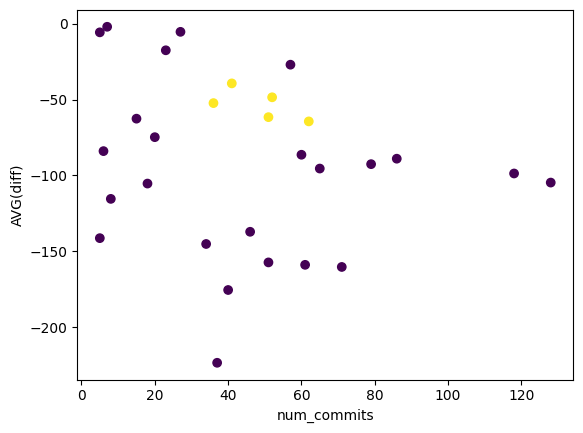

For 5 clusters s_score is 0.4638


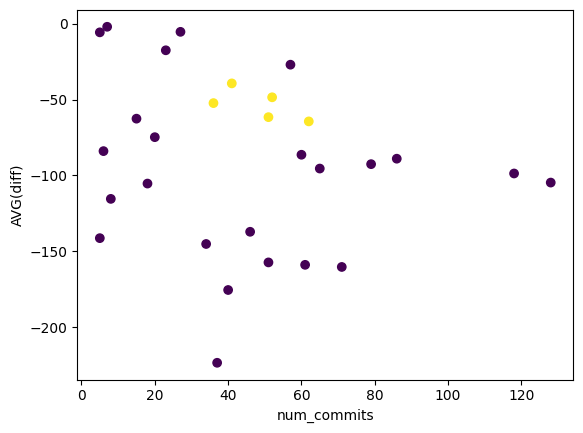

For 6 clusters s_score is 0.4527


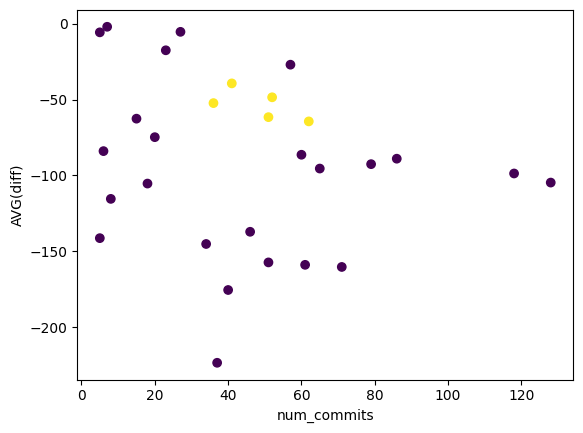

For 7 clusters s_score is 0.4866


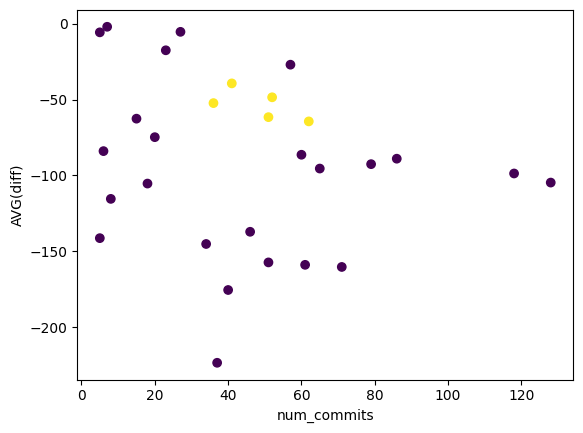

For 8 clusters s_score is 0.5078


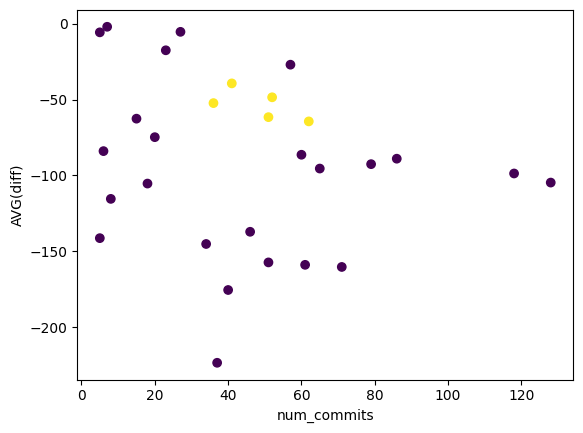

For 9 clusters s_score is 0.4758


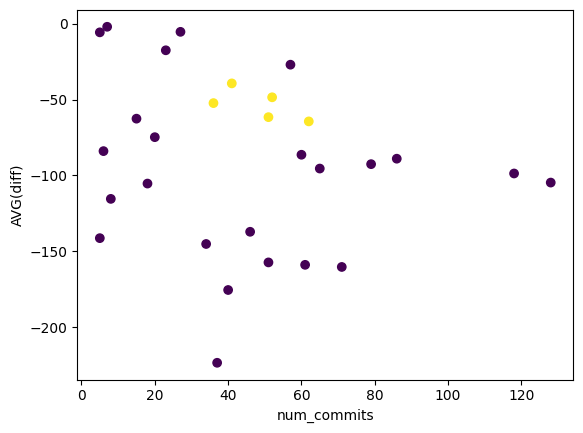

For 10 clusters s_score is 0.4312


In [104]:
for n in range(5, 11):
    aggl = AgglomerativeClustering(n_clusters=n)
    aggl.fit(df)
    s_score = silhouette_score(df, aggl.labels_, random_state=21)
    #plt.figure(figsize=(15,8))
    plt.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=clustering.labels_)
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.show()
    print(f"For {n} clusters s_score is {s_score:.4f}")

In [105]:
aggl = AgglomerativeClustering(n_clusters=5, linkage='ward', compute_full_tree=True, compute_distances=True)
aggl.fit(df)
aggl.children_.shape

(28, 2)

In [106]:
counts = np.zeros(aggl.children_.shape[0]) # 0-массив размером с кол-во слияний
n_samples = len(aggl.labels_)
for i, (left, right) in enumerate(aggl.children_):
    size = 0
    for child in [left, right]:
        if child < n_samples:  # Если это исходная точка
            size += 1
        else:  # Если это ранее созданный кластер
            size += counts[child - n_samples]
    counts[i] = size

In [107]:
linkage_matrix = np.column_stack([
    aggl.children_,        # Шаги слияния
    aggl.distances_,       # Расстояния между кластерами
    counts
]).astype(float)
linkage_matrix

array([[  4.        ,  11.        ,   4.1766547 ,   2.        ],
       [  7.        ,  12.        ,   7.87146746,   2.        ],
       [  2.        ,  28.        ,  10.09752445,   2.        ],
       [  6.        ,   8.        ,  10.38315944,   2.        ],
       [  0.        ,   3.        ,  11.3507709 ,   2.        ],
       [  5.        ,  24.        ,  11.66190379,   2.        ],
       [ 14.        ,  22.        ,  12.80733297,   2.        ],
       [  1.        ,  26.        ,  13.18483978,   2.        ],
       [ 15.        ,  21.        ,  13.92838828,   2.        ],
       [  9.        ,  27.        ,  14.2130222 ,   2.        ],
       [ 10.        ,  16.        ,  14.45      ,   2.        ],
       [ 13.        ,  37.        ,  15.88966587,   3.        ],
       [ 23.        ,  31.        ,  17.52293735,   3.        ],
       [ 19.        ,  36.        ,  22.10098037,   3.        ],
       [ 30.        ,  32.        ,  28.28506673,   4.        ],
       [ 29.        ,  35

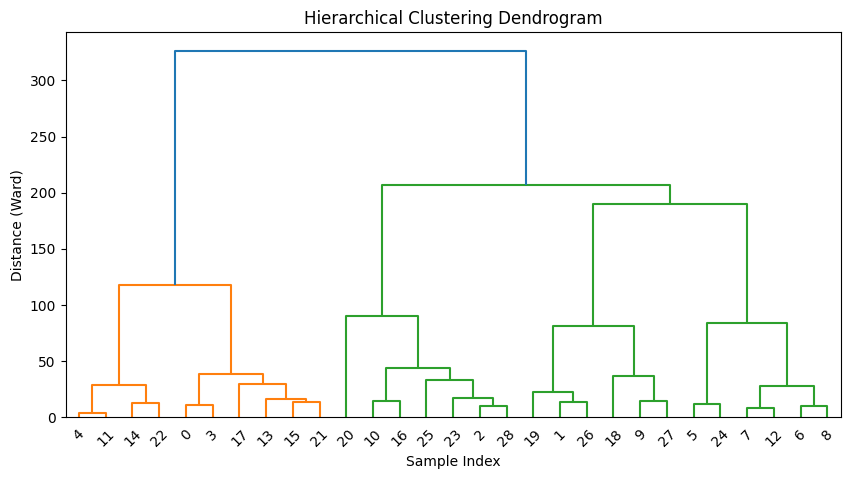

In [108]:
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance (Ward)')
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [109]:
def hyperparameters_opt (model, optimized_param, param_range, df, **kwargs,):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    best_score = -1
    best_param = None
    scores = []

    for param in param_range:
        model.set_params(**{optimized_param: param})
        model.fit(df)
        s_score = silhouette_score(df, model.labels_, random_state=21)
        scores.append(s_score)

        ax1.scatter(param, s_score, c='red')
        #ax1.plot(param_range, scores,'r-')

        if s_score > best_score:
            best_score = s_score
            best_param = param

    ax1.set_xlabel(f'optimized_param - {optimized_param}')  
    ax1.set_ylabel('s_score')
    ax1.set_title('S-score vs Parameter')

    model.set_params(**{optimized_param: best_param})
    model.fit(df)
    ax2.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=model.labels_, cmap = 'viridis')
    ax2.set_xlabel('num_commits')
    ax2.set_ylabel('AVG(diff)')
    ax2.set_title(f'Best s_score is {best_score:.4f} for {best_param} {optimized_param}')

    plt.tight_layout()
    plt.show()

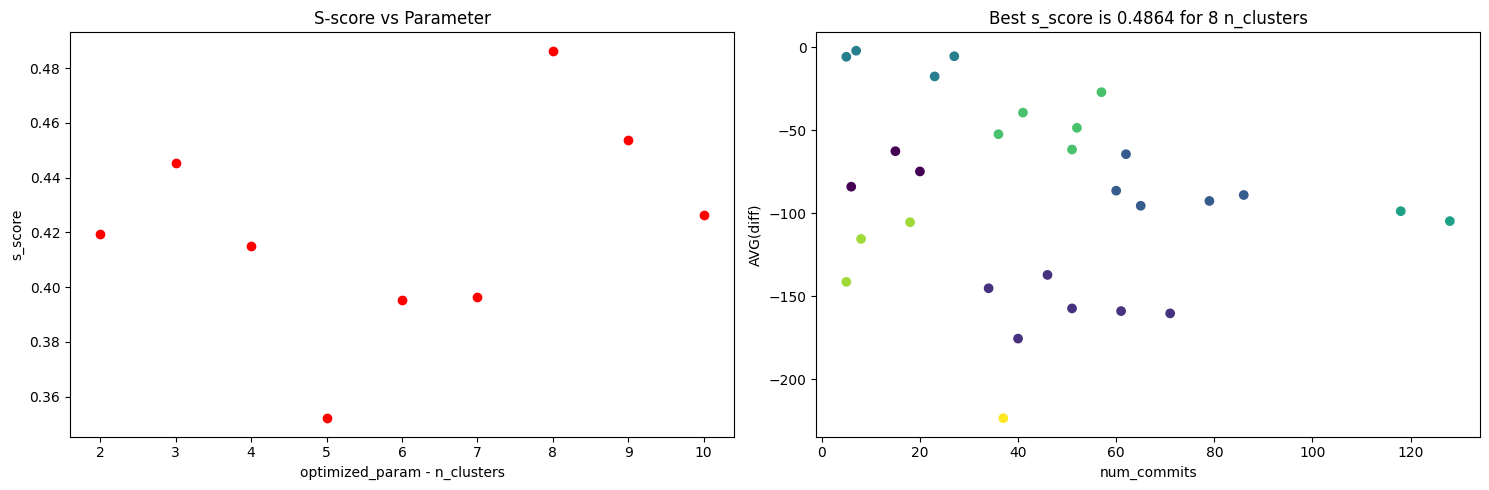

In [110]:
hyperparameters_opt(KMeans(random_state=21), 'n_clusters', range(2, 11), df)

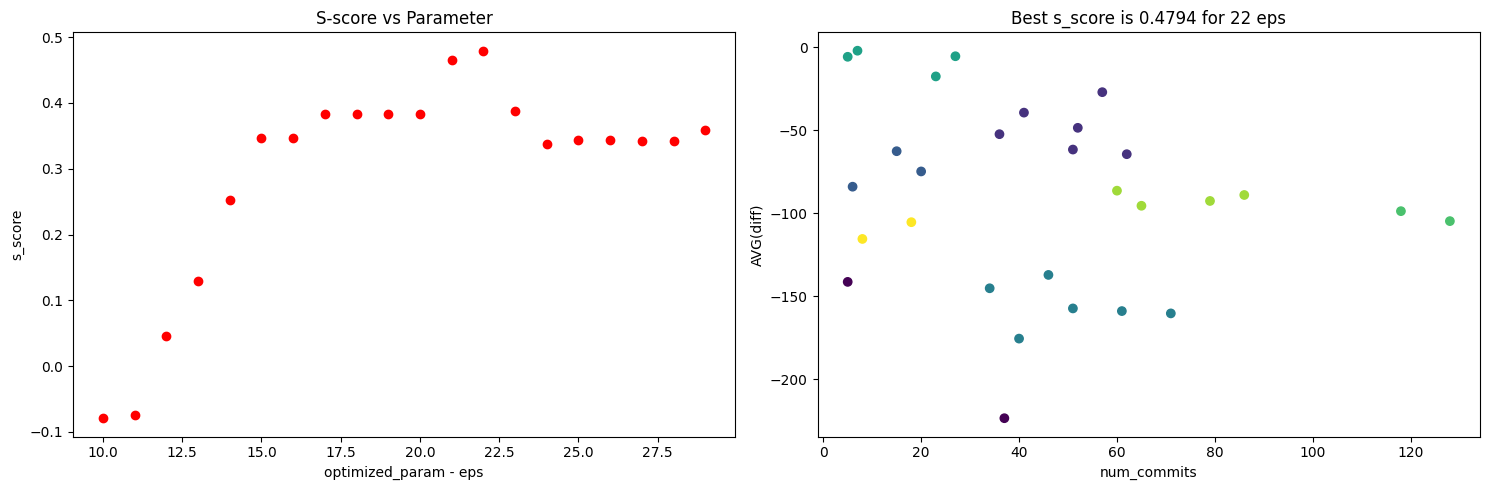

In [111]:
hyperparameters_opt(DBSCAN(min_samples=2), 'eps', range(10, 30), df)

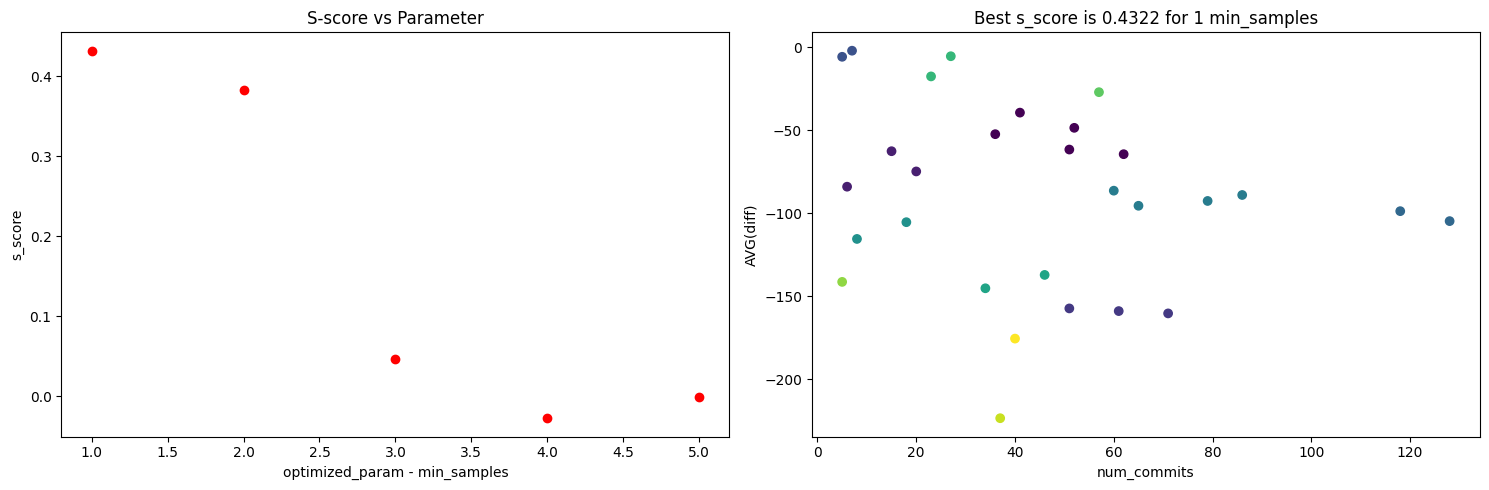

In [112]:
hyperparameters_opt(DBSCAN(eps=20), 'min_samples', range(1, 6), df)

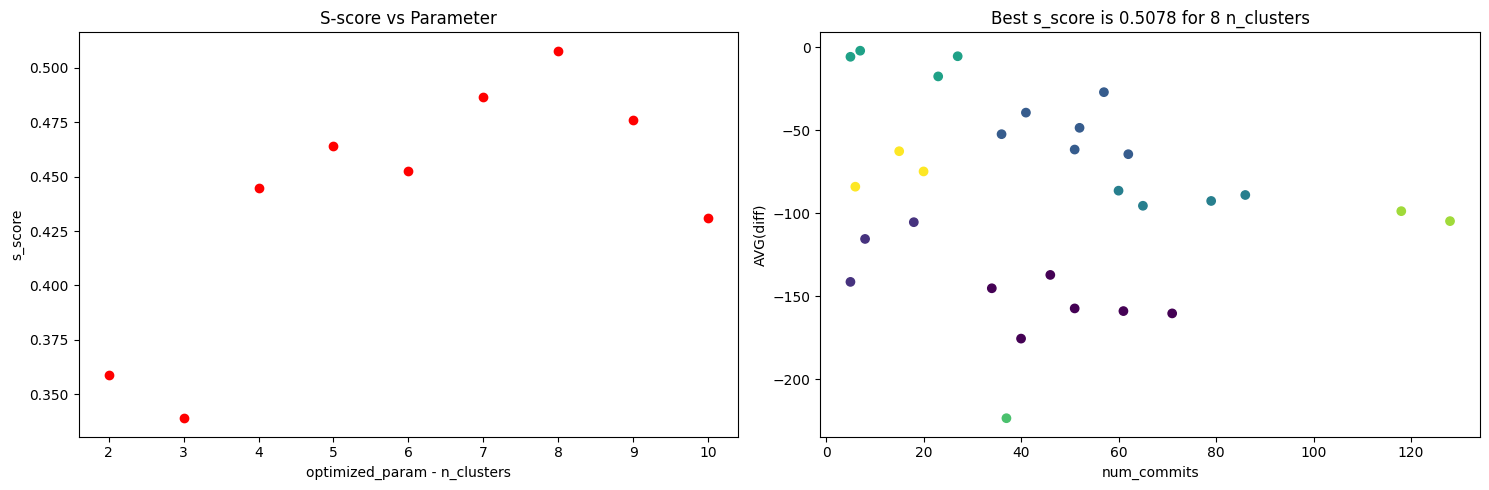

In [113]:
hyperparameters_opt(AgglomerativeClustering(), 'n_clusters', range(2, 11), df)